In [10]:
center = position
radius = 10*u.deg

In [26]:
position


<SkyCoord (ICRS): (ra, dec) in deg
    (49.95066663, 41.5116969)>

In [11]:
from gammapy.maps import Map

def create_sky_map(center, **kwargs):
    kwargs.setdefault('width', (10*u.deg, 10*u.deg))
    kwargs.setdefault('proj', 'CAR')
    kwargs.setdefault('binsz', 0.05)# Pixel size in degrees
    kwargs.setdefault('map_type', 'wcs')# 'wcs', 'wcs-sparse', 'hpx', 'hpx-sparse', 'region'
    kwargs.setdefault('frame', center.frame.name)# Galactic ('galactic') or Equatorial ('icrs')

    return Map.create(
        skydir=center, # Coordinate of map center
        **kwargs)

In [12]:
create_sky_map(center=position)

WcsNDMap

	geom  : WcsGeom 
 	axes  : ['lon', 'lat']
	shape : (200, 200)
	ndim  : 2
	unit  : 
	dtype : float32

In [38]:
f'{center.ra.deg:.2f}deg'

'49.95deg'

In [60]:
from matplotlib.patches import Circle  # $matplotlib/patches.py
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

def show_sky_map(center, radius, target_name = 'target', ax=None, **kwargs):
    
    pos_ra = center.ra.value
    pos_dec= center.dec.value
    
    ax = plt.gca() if ax is None else ax
    
    if abs(center.dec.value) < 45:
        offset_lim = 2*radius.value
    elif abs(center.dec.value) < 60:
        offset_lim = 2.5*radius.value
    elif abs(center.dec.value) < 70:
        offset_lim = 3*radius.value
    else: offset_lim = 4*radius.value
        
    xlim = [center.ra.value+offset_lim, center.ra.value-offset_lim]
    ylim = [center.dec.value+offset_lim, center.dec.value-offset_lim]
    
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    circle = SphericalCircle(center, radius, ec='b', fc='none', lw=.5, ls='--')
    ax.add_artist(circle)
    
    offset_text_ra = 1.5*radius.value
    offset_text_dec = 1.3*radius.value


    ax.annotate(
        f"{target_name} (RA: {center.ra.deg:.2f}deg, Dec: {center.dec.deg:.2f}deg, radius: {radius.value:.2f}deg)",
        (pos_ra, pos_dec),
        fontsize= 6.5,
        horizontalalignment='left', 
        verticalalignment='center_baseline',
        color="b",
        xytext=(
            pos_ra+offset_text_ra,
            pos_dec-offset_text_dec
        ),
        arrowprops = dict(arrowstyle="-", color="b")
    )

#     ax.scatter(
#         pos_ra,
#         pos_dec,
#         s=80,
#         label=target_name, 
#         marker="P", 
#         edgecolor='b', 
#         ec='b', 
#         lw=.5,
#         facecolor='b')
            
            
    ax.yaxis.set_units(u.Unit("degree"))
    ax.xaxis.set_units(u.Unit("degree"))
    ax.legend(labelcolor="black", markerscale=.75)
    ax.set_xlabel(r'Righ Ascension (deg)')   
    ax.set_ylabel(r'Declination (deg)')
    ax.set_facecolor("white")
    
    sky_map = create_sky_map(center)
    sky_map.plot(ax)



    return ax

In [94]:
pos_ra

49.95066662584999

In [165]:
from matplotlib.patches import Circle  # $matplotlib/patches.py
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

def show_sky_map_(position, ax=None, **kwargs):
    
#         if np.isscalar(c):
#         kwargs.setdefault('color', c)
#         c = None

#     if 'fc' in kwargs:
#         kwargs.setdefault('facecolor', kwargs.pop('fc'))
#     if 'ec' in kwargs:
#         kwargs.setdefault('edgecolor', kwargs.pop('ec'))
#     if 'ls' in kwargs:
#         kwargs.setdefault('linestyle', kwargs.pop('ls'))
#     if 'lw' in kwargs:
#         kwargs.setdefault('linewidth', kwargs.pop('lw'))
        
    kwargs.setdefault('s', 50)
    kwargs.setdefault('ec', 'black')
    kwargs.setdefault('lw', .5)
#     kwargs.setdefault('label', name)
    kwargs.setdefault('marker', 'o')
    kwargs.setdefault('c', 'blue')
    kwargs.setdefault('edgecolor', 'blue')
    kwargs.setdefault('facecolor', 'blue')
#     kwargs.setdefault('markersize', 5)

    
    pos_ra = position.ra
    pos_dec= position.dec
    
    ax = plt.gca() if ax is None else ax
    
 
    ax.scatter(
        pos_ra,
        pos_dec,
        **kwargs,
    )
            
    ax.set_facecolor("white")
    ax.yaxis.set_units(u.Unit("degree"))
    ax.xaxis.set_units(u.Unit("degree"))
    ax.set_xlabel(r'Righ Ascension (deg)')   
    ax.set_ylabel(r'Declination (deg)')
    ax.legend(labelcolor="black", markerscale=.75)
    ax.plot()
    return ax

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Can't set coordinate axes. No WCS information available.
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


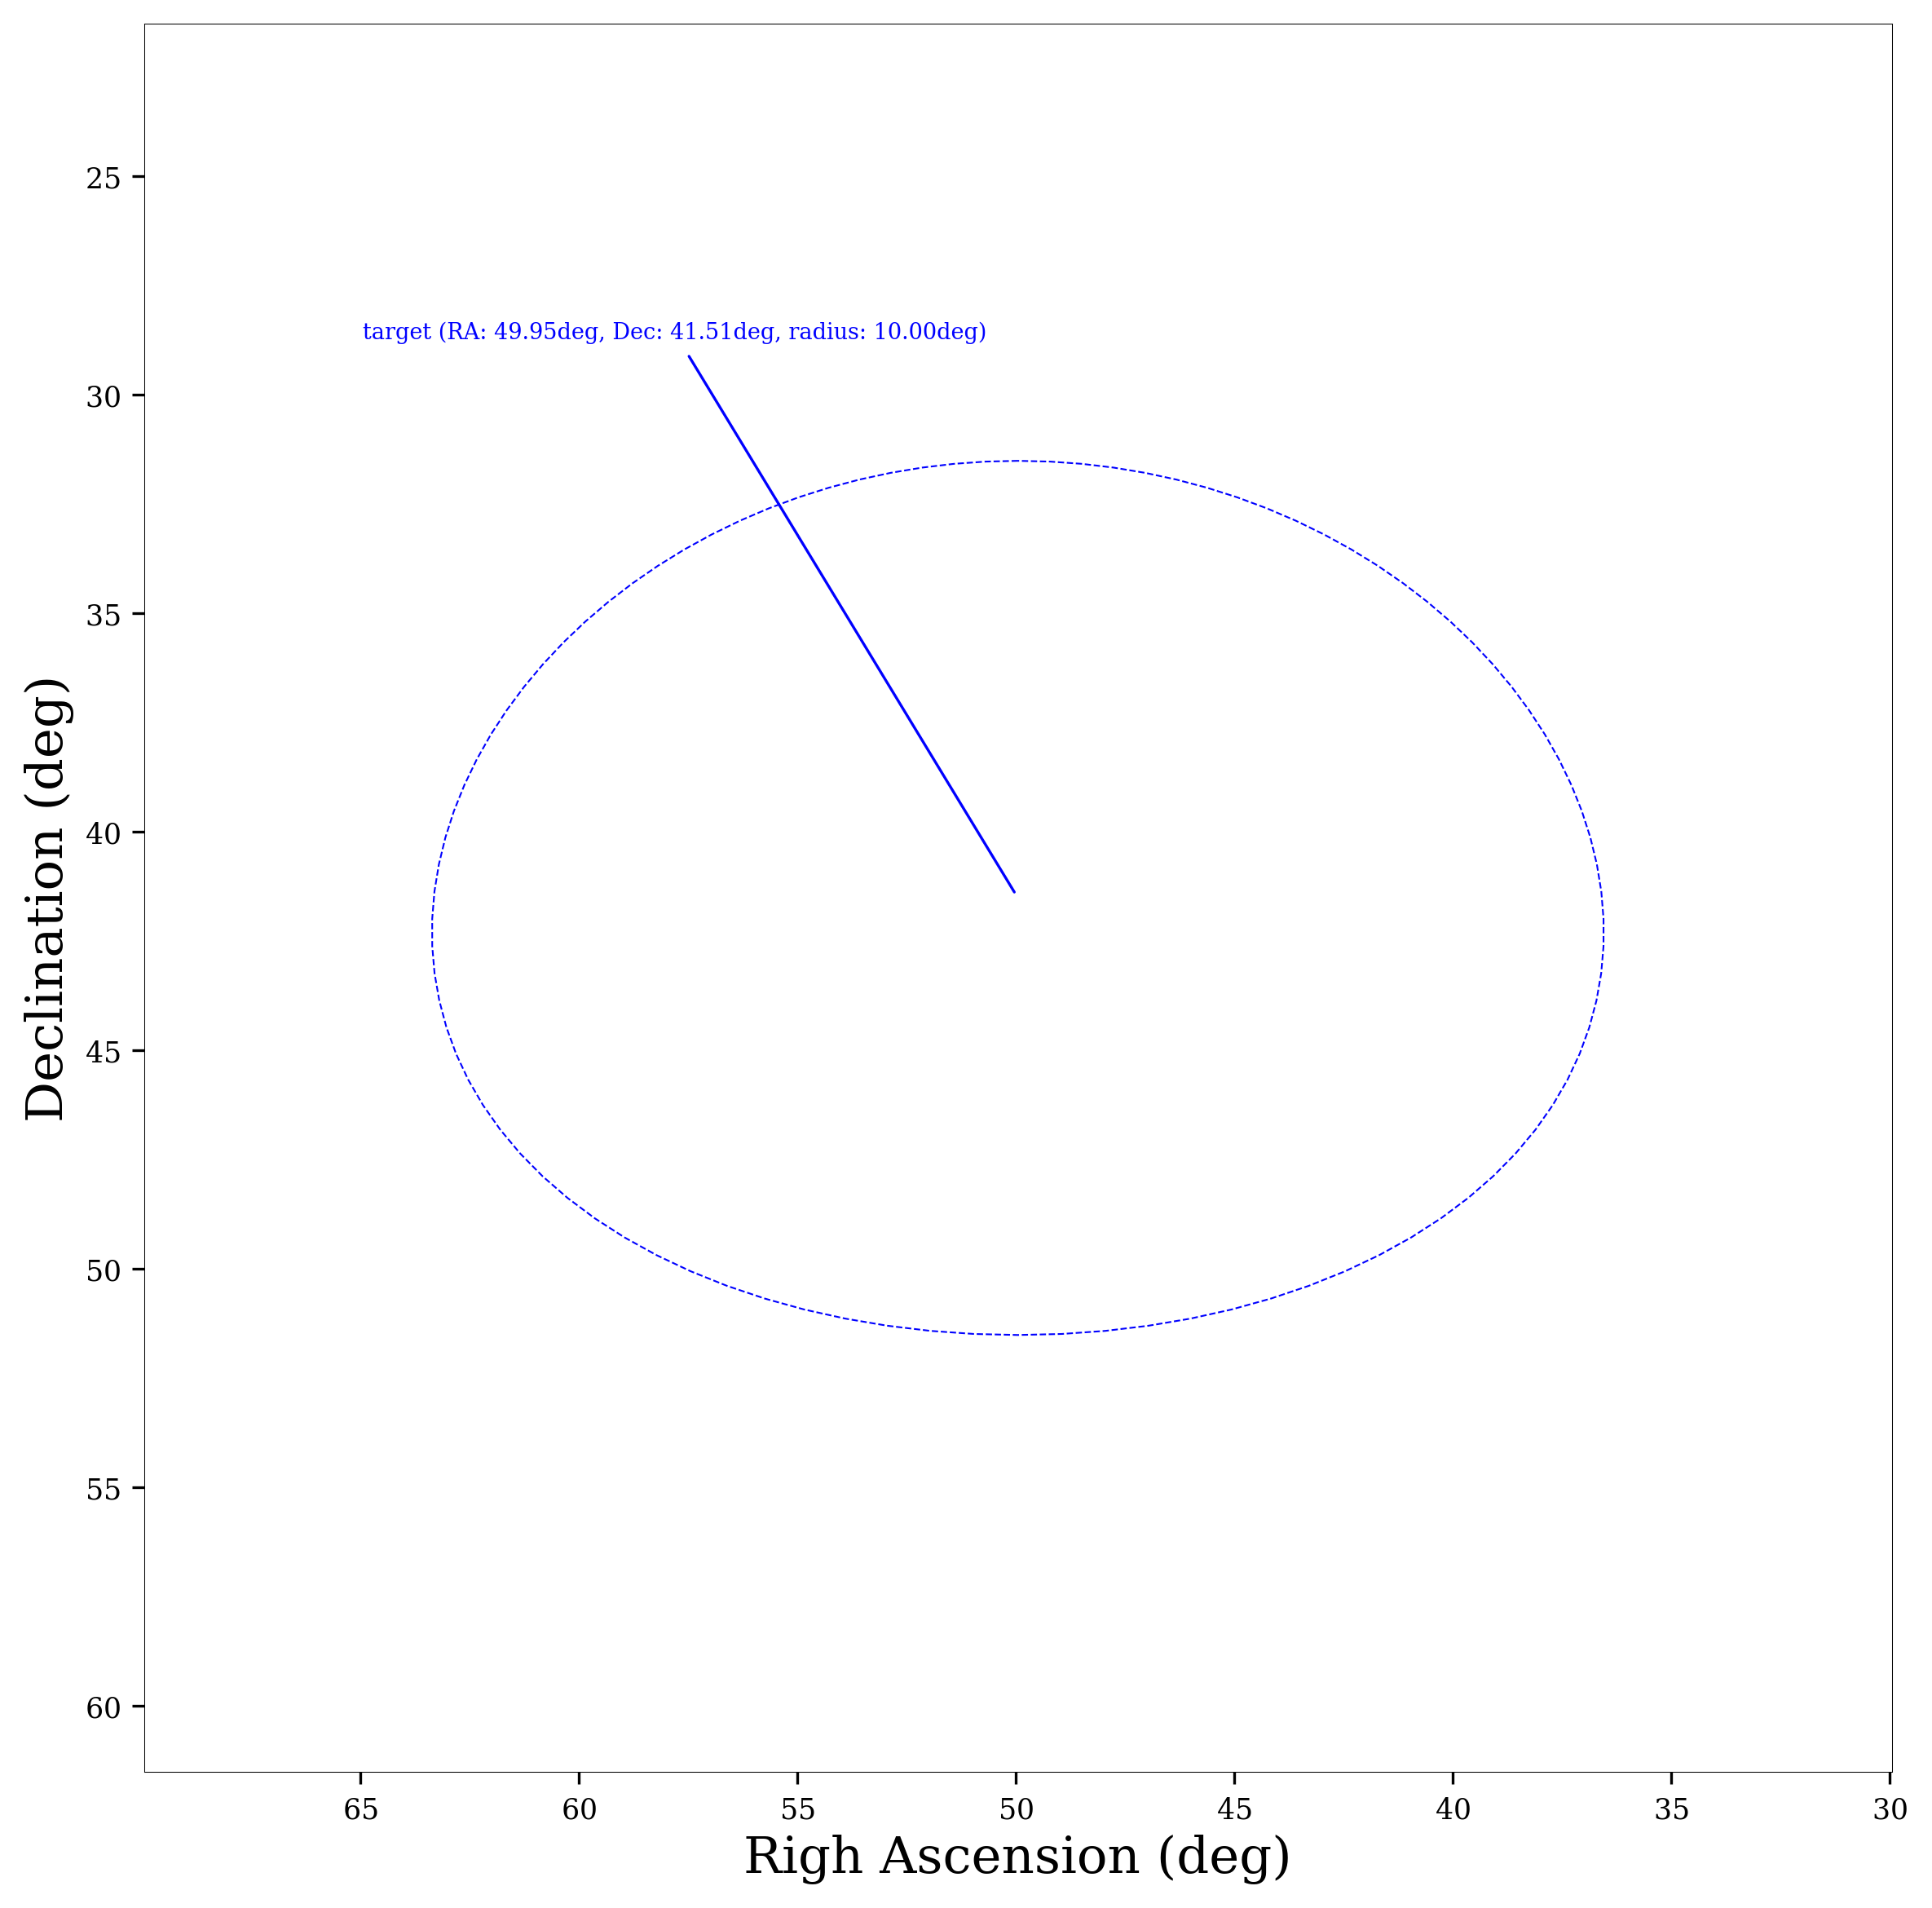

In [174]:
fig, ax = plt.subplots(figsize=(8,8))

ax = show_sky_map(center, radius, ax=ax)

In [57]:
leg_style = setting_leg_style({}, datasets.names)

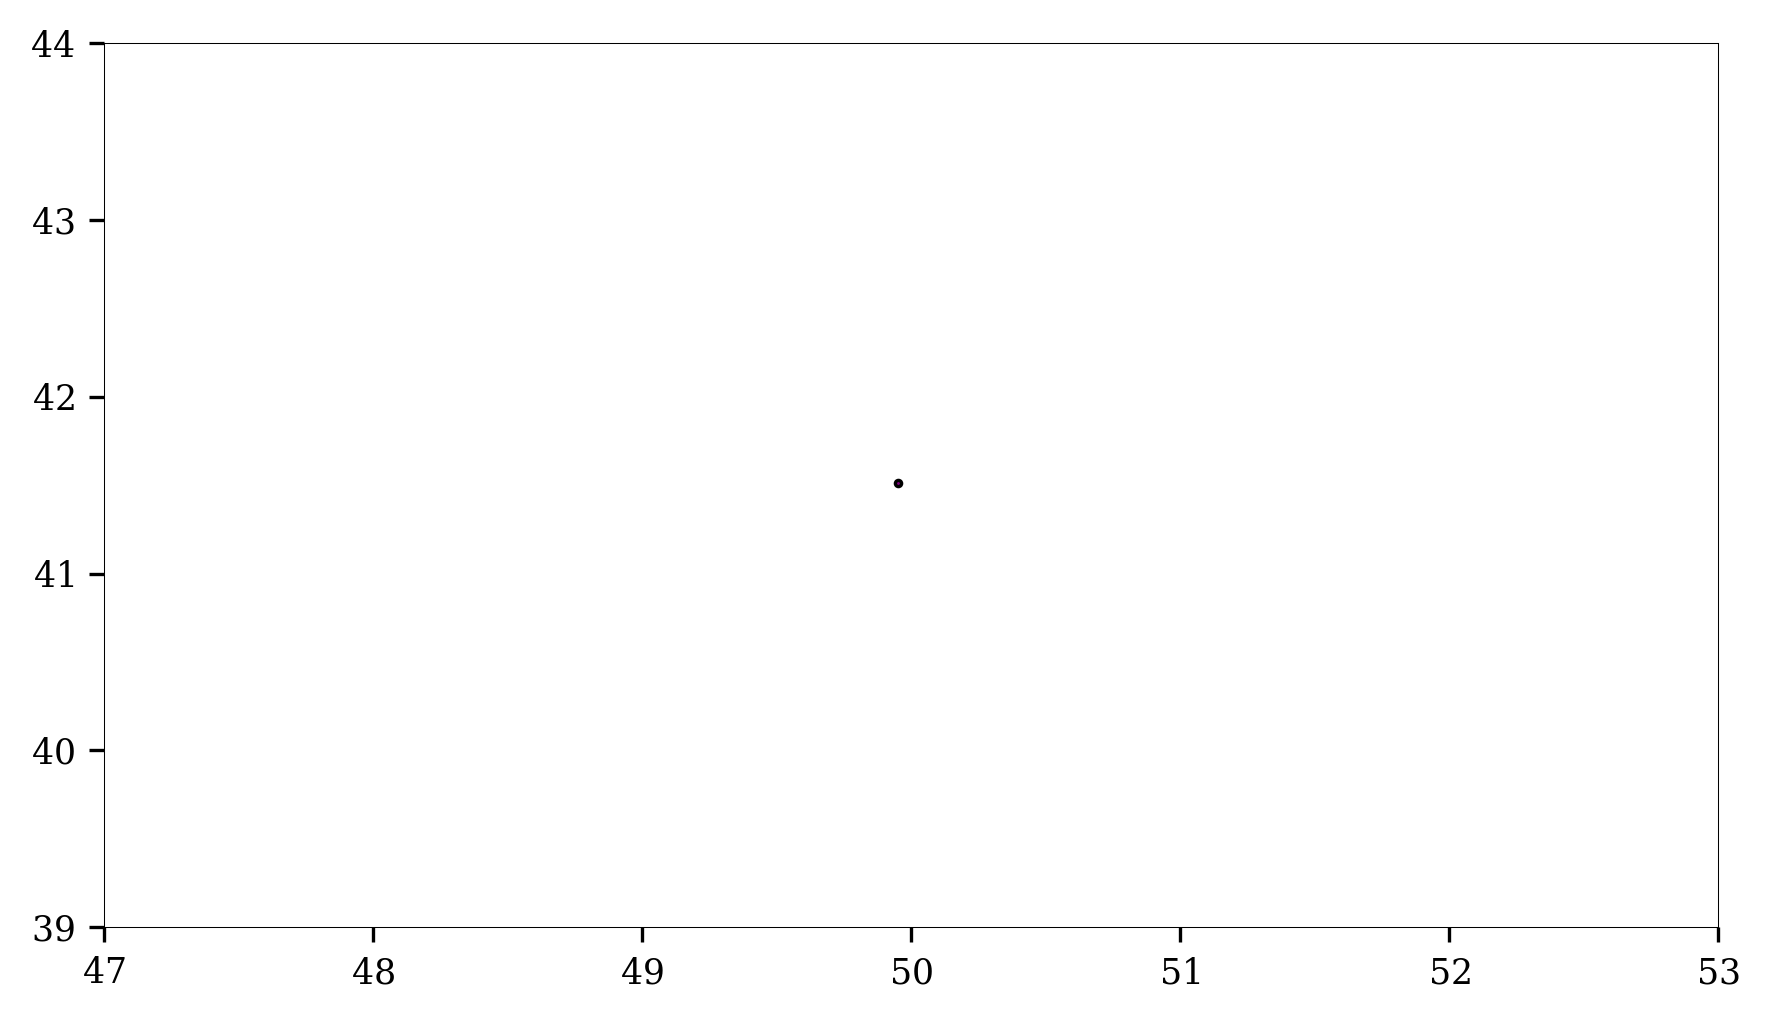

In [86]:
pos_ra = position.ra.value
pos_dec= position.dec.value
plt.scatter(
    pos_ra,
    pos_dec,
#     **kwargs,
)

In [97]:
ax=show_sky_map_(position, 'radius',  ax)

In [157]:
markers

{'3FGL J0319.8+4130': ['#785EF0', '>', 5],
 '4FGL J0319.8+4130': ['#EA83B7', 'H', 5],
 '2FHL J0319.8+4131': ['#DC267F', '^', 5],
 '3FHL J0319.8+4130': ['#FE6100', 'P', 6.0]}

In [166]:
catalogs = analysis.catalogs
datasets = analysis.datasets
markers = generate_marker_set(datasets.names, 5)
kwargs_list = []
kwargs = {}
for key in list(markers.keys()):
    kwargs = {}
    print(key)
    kwargs['label'] = key
    kwargs['c'] = markers[key][0]
    kwargs['edgecolor'] = markers[key][0]
    kwargs['facecolor'] = markers[key][0]
    kwargs['marker'] = markers[key][1]
#     kwargs['markersize'] = markers[key][2]
    kwargs_list.append(kwargs)

4 unique markers generated
3FGL J0319.8+4130
4FGL J0319.8+4130
2FHL J0319.8+4131
3FHL J0319.8+4130


In [167]:
kwargs_list

[{'label': '3FGL J0319.8+4130',
  'c': '#648FFF',
  'edgecolor': '#648FFF',
  'facecolor': '#648FFF',
  'marker': 'o'},
 {'label': '4FGL J0319.8+4130',
  'c': '#EA83B7',
  'edgecolor': '#EA83B7',
  'facecolor': '#EA83B7',
  'marker': 'X'},
 {'label': '2FHL J0319.8+4131',
  'c': '#449C8C',
  'edgecolor': '#449C8C',
  'facecolor': '#449C8C',
  'marker': 'P'},
 {'label': '3FHL J0319.8+4130',
  'c': '#FE6100',
  'edgecolor': '#FE6100',
  'facecolor': '#FE6100',
  'marker': 's'}]

In [171]:
 kwargs_list

[{'label': '3FGL J0319.8+4130',
  'c': '#648FFF',
  'edgecolor': '#648FFF',
  'facecolor': '#648FFF',
  'marker': 'o'},
 {'label': '4FGL J0319.8+4130',
  'c': '#EA83B7',
  'edgecolor': '#EA83B7',
  'facecolor': '#EA83B7',
  'marker': 'X'},
 {'label': '2FHL J0319.8+4131',
  'c': '#449C8C',
  'edgecolor': '#449C8C',
  'facecolor': '#449C8C',
  'marker': 'P'},
 {'label': '3FHL J0319.8+4130',
  'c': '#FE6100',
  'edgecolor': '#FE6100',
  'facecolor': '#FE6100',
  'marker': 's'}]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
Can't set coordinate axes. No WCS information available.


{'label': '3FGL J0319.8+4130', 'c': '#648FFF', 'edgecolor': '#648FFF', 'facecolor': '#648FFF', 'marker': 'o'}
{'label': '4FGL J0319.8+4130', 'c': '#EA83B7', 'edgecolor': '#EA83B7', 'facecolor': '#EA83B7', 'marker': 'X'}
{'label': '2FHL J0319.8+4131', 'c': '#449C8C', 'edgecolor': '#449C8C', 'facecolor': '#449C8C', 'marker': 'P'}
{'label': '3FHL J0319.8+4130', 'c': '#FE6100', 'edgecolor': '#FE6100', 'facecolor': '#FE6100', 'marker': 's'}


/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/astropy/visualization/mpl_normalize.py:179: RuntimeWarning: invalid value encountered in divide
  np.true_divide(values, self.vmax - self.vmin, out=values)


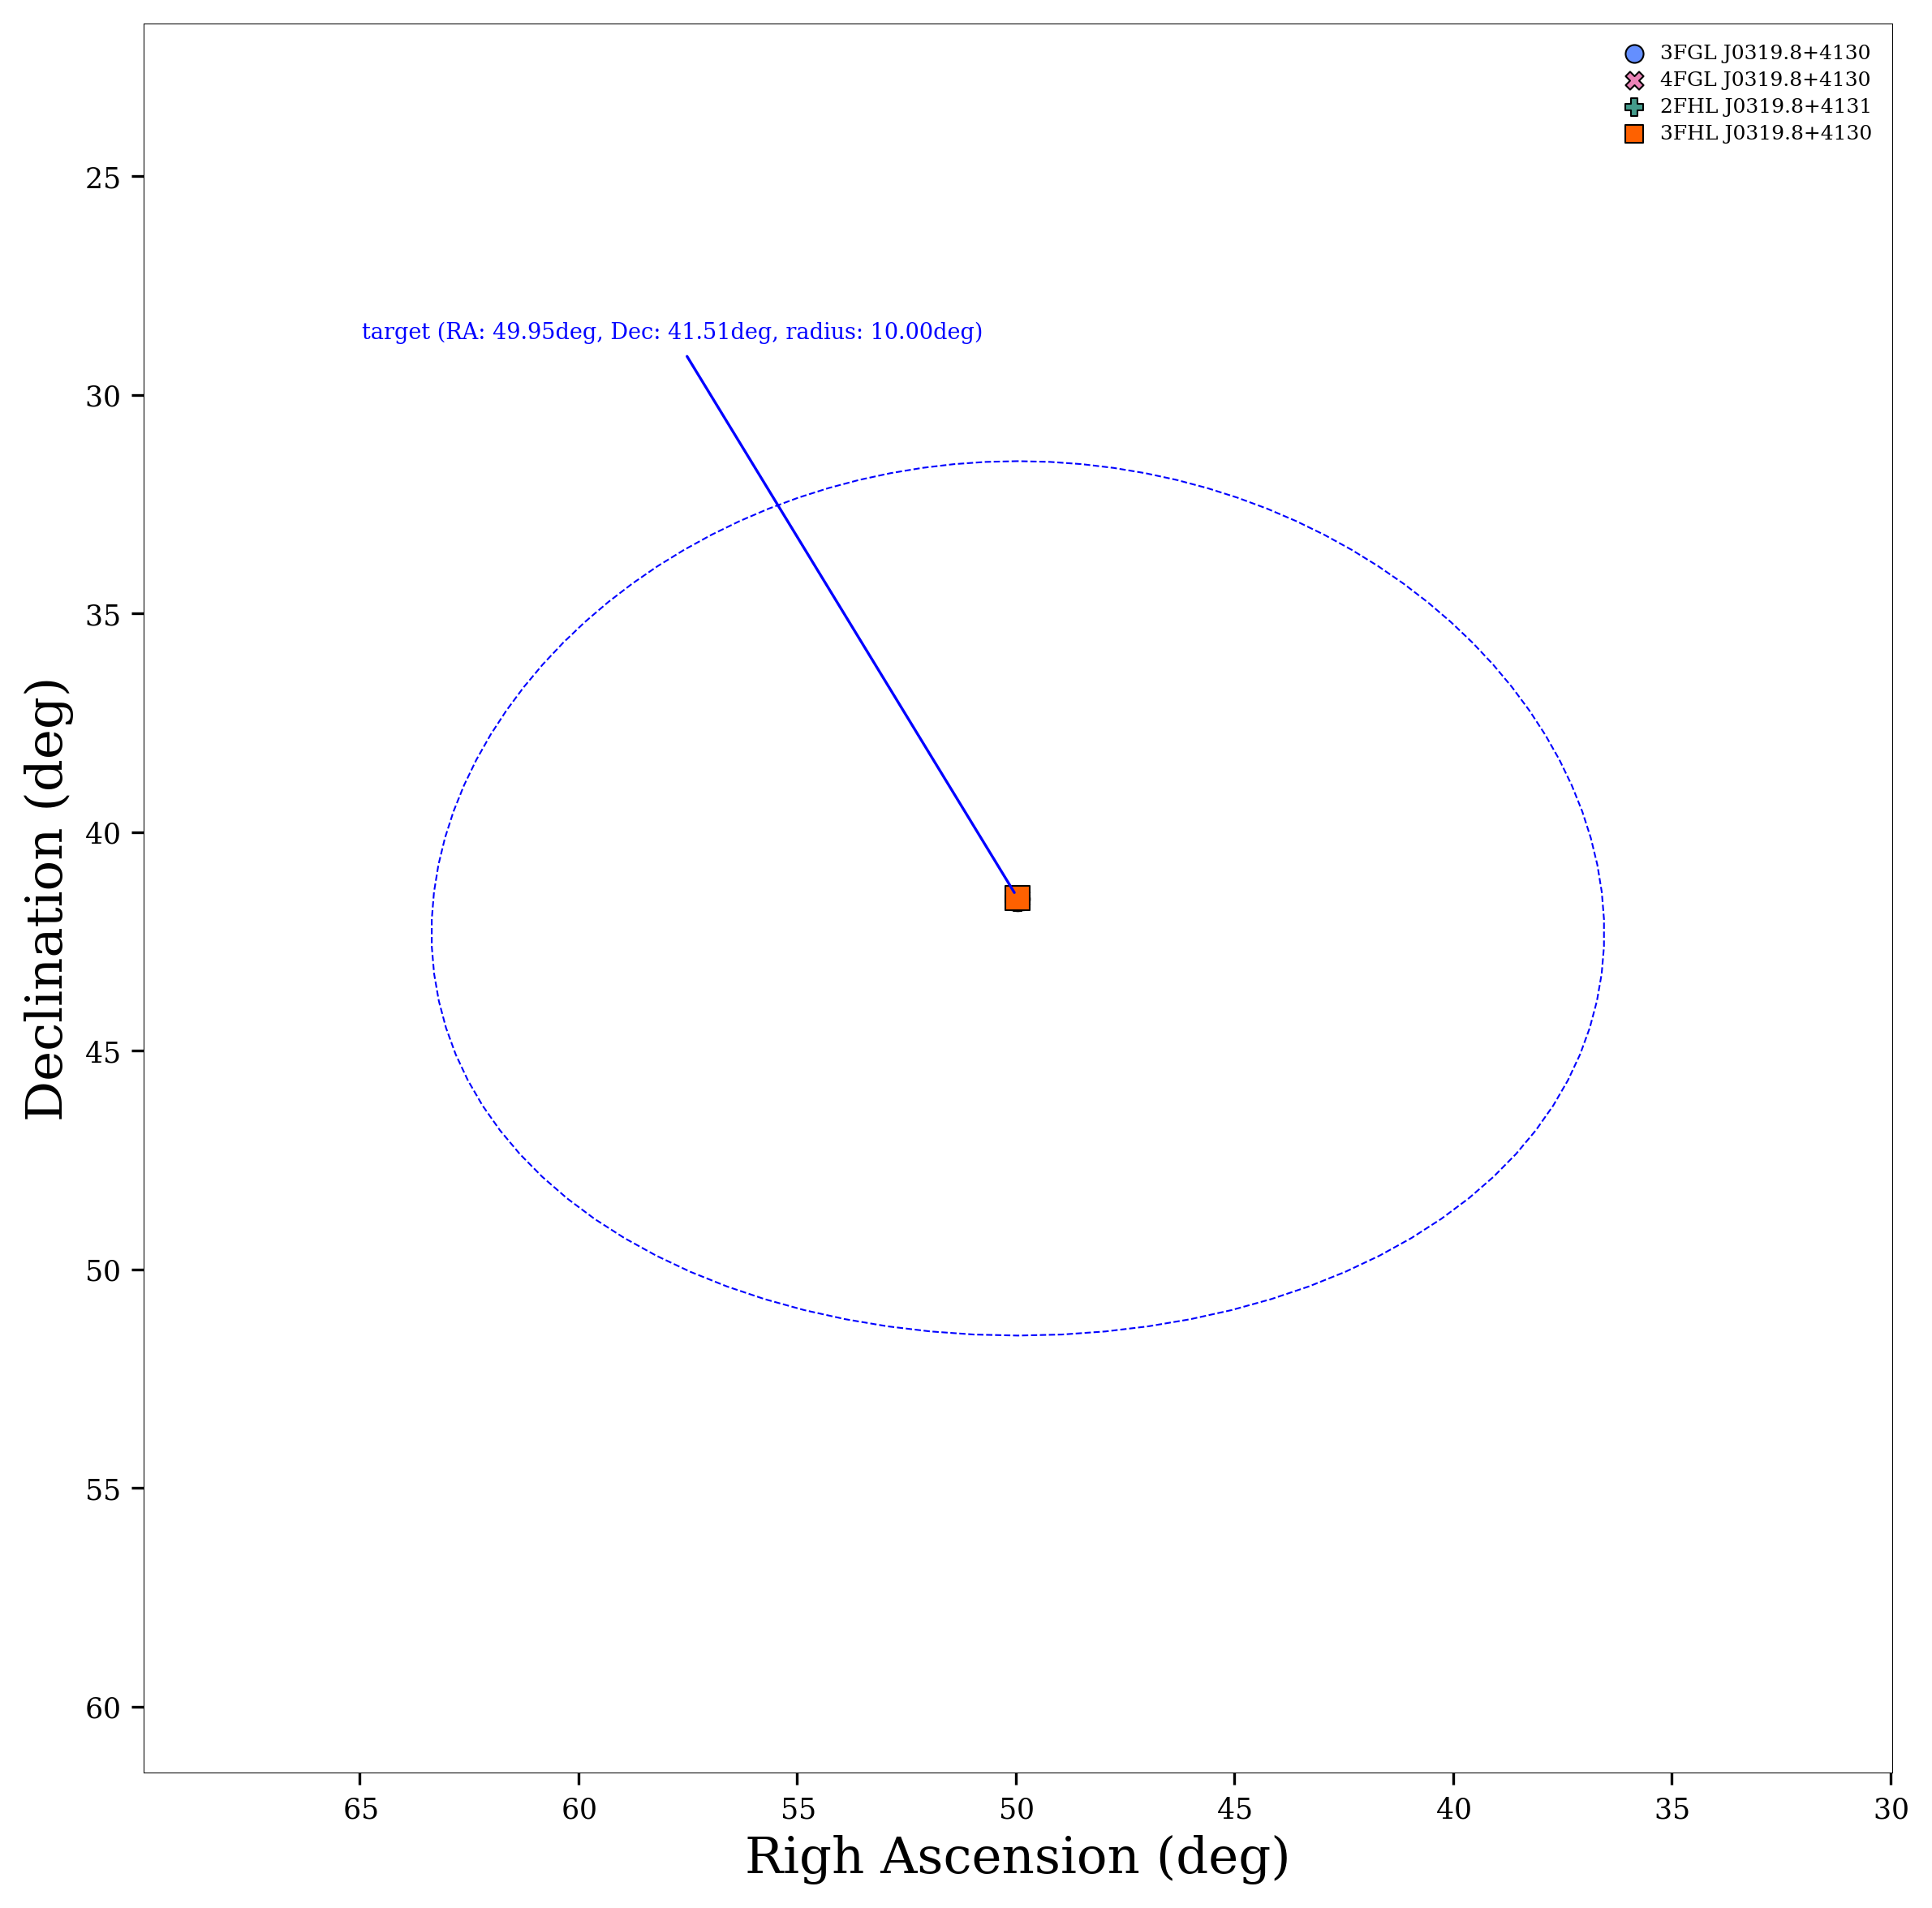

In [173]:
fig, ax = plt.subplots(figsize=(8,8))

ax = show_sky_map(center, radius, ax=ax)
for index, source in enumerate(analysis.sources):
    name = datasets[index].name
    position = source.position
    kwargs = kwargs_list[index]
    print( kwargs_list[index])
    ax = show_sky_map_(position, ax=ax, **kwargs)

plt.xlabel(r'Righ Ascension (deg)')   
plt.ylabel(r'Declination (deg)')
ax.set_facecolor("white")
plt.show()

In [ ]:
from matplotlib.patches import Circle  # $matplotlib/patches.py
from astropy.coordinates import SkyCoord
from astropy.visualization.wcsaxes import SphericalCircle

from gammapy.utils.regions import SphericalCircleSkyRegion
# help(Map)

def show_sky_map(
    name, 
    leg_style, 
    sources, 
    datasets,
    pulsars,
    roi,
    width=(20 * u.deg, 20 * u.deg)):
    
    frame  = "icrs" # International Celestial Reference System (ICRS)
    unit   = "deg"  # Degrees units
    fontsize = 6.5
    rotation = 20
    s=30
    offset_text_ra = 1.5*roi.radius.value
    offset_text_dec = 1.3*roi.radius.value
    horizontalalignment='left'
    verticalalignment='center_baseline' # 'top', 'bottom', 'center', 'baseline', 'center_baseline'
        
#     region = SphericalCircleSkyRegion(center, radius=5 * u.deg) # defines the region

    target_name = roi.name
    radius = roi.radius
    position = roi.position 
    pos_ra = position.ra.value
    pos_dec= position.dec.value
            
    center = SkyCoord(pos_ra, pos_dec, unit=unit, frame=frame) # Source Position
        
    fig, ax = plt.subplots(figsize=(7, 7))

    kwargs = {"ax": ax}
    
    
    if abs(center.dec.value) < 45:
    	offset_lim = 2*roi.radius.value
    elif abs(center.dec.value) < 60:
    	offset_lim = 2.5*roi.radius.value
    elif abs(center.dec.value) < 70:
    	offset_lim = 3*roi.radius.value
    else:
    	offset_lim = 4*roi.radius.value
   
    
#    offset_lim = 2*roi.radius.value

    xlim = [center.ra.value+offset_lim, center.ra.value-offset_lim]
    ylim = [center.dec.value+offset_lim, center.dec.value-offset_lim]
    
    ax.set_ylim(ylim)
    ax.set_xlim(xlim)
    
    marker = "P"
    color = "b"
    
    #circle = Circle((pos_ra,pos_dec), radius=radius.value, edgecolor="b", lw=.5, ls='--',facecolor='none')
    circle = SphericalCircle((pos_ra * u.deg, pos_dec * u.deg), radius.value * u.degree, ec='b', fc='none', lw=.5, ls='--')
   
    ax.add_artist(circle)
    ax.annotate(
        f"{target_name} ({radius})",
        (pos_ra, pos_dec),
        fontsize=fontsize,
        horizontalalignment=horizontalalignment, 
        verticalalignment=verticalalignment,
        color=color,
        xytext=(
            pos_ra+offset_text_ra,
            pos_dec-offset_text_dec
        ),
        arrowprops = dict(arrowstyle="-", color=color)
    )

    ax.scatter(
        pos_ra,
        pos_dec,
        s=s+50,
        label=target_name, 
        marker=marker, 
        edgecolor=color, 
        ec='black', 
        lw=.5,
        facecolor=color)
            
            
    ax.yaxis.set_units(u.Unit("degree"))
    ax.xaxis.set_units(u.Unit("degree"))
    
    for index, source in enumerate(sources):
                    
            source_pos = source.position
            pos_ra = source_pos.ra.value
            pos_dec= source_pos.dec.value
            source_name = datasets[index].name
            
            color = leg_style[source_name][0]
            marker = leg_style[source_name][1]

            ax.scatter(
                pos_ra,
                pos_dec,
                s=s+50,
                label=source_name, 
                marker=marker, 
                edgecolor=color, 
                ec='black', 
                lw=.5,
                facecolor=color
            )
            
    for index, source in enumerate(pulsars):

        source_pos = source.position
        pos_ra = source_pos.ra.value
        pos_dec= source_pos.dec.value
        source_name = source.name

        color = leg_style[source_name][0]
        marker = leg_style[source_name][1]

        ax.scatter(
            pos_ra,
            pos_dec,
            s=170,
            label=source_name, 
            marker= "*", 
            edgecolor=None, 
            ec='black', 
            lw=.5,
            facecolor=None
        )
            
#     lines = plt.gca().get_lines()
#     include = [0,1]
#     legend1 = plt.legend([lines[i] for i in include],[lines[i].get_label() for i in include], loc=1)
#     legend2 = plt.legend([lines[i] for i in [2,3]],['manual label 3','manual label 4'], loc=4)
# plt.gca().add_artist(legend1)
# plt.show()

    ax.legend(labelcolor="black", markerscale=.75)
    
    sky_map = create_sky_map(center, width)
    sky_map.plot(ax)

    plt.xlabel(r'Righ Ascension (deg)')   
    plt.ylabel(r'Declination (deg)')
    ax.set_facecolor("white")
    
#     path_file =  utl.get_path_sky_maps(region_of_interest)  
#     file_name = utl.name_to_txt(name)
        
#     savefig(path_file, file_name)
    
    # plt.legend(*scatter.legend_elements())
    return


# In[ ]:





In [ ]:
%matplotlib inline

### NGC 1275
http://tevcat.uchicago.edu/?mode=1;id=212</br>

https://ned.ipac.caltech.edu/byname?objname=NGC+1275&hconst=67.8&omegam=0.308&omegav=0.692&wmap=4&corr_z=1

In [ ]:

from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.units import  Quantity

from gammapy.utils.scripts import make_path
from gammapy.catalog import CATALOG_REGISTRY
from gammapy.datasets import Datasets
from gammapy.modeling.models import Models, LogParabolaSpectralModel, SkyModel
from gammapy.modeling import Fit

from gammapy.maps.axes import UNIT_STRING_FORMAT
from astropy.table import Column

from astropy.table import unique, Table
import numpy as np



from feupy.utils.string_handling import name_to_txt



from feupy.plotters import show_SED, show_sky_map, set_leg_style_models, setting_leg_style, generate_marker_set

from config import path_blazars_tables, get_datasets_blazars

from feupy.plotters.config import *

from gammapy.datasets import Datasets, FluxPointsDataset

from gammapy.estimators import FluxPoints

In [1]:
import os
import sys
import importlib
module_path = os.path.abspath(f'/home/born-again/Documents/GitHub/gamma-ray_from_blazars/')
if module_path not in sys.path:
    sys.path.append(module_path)

import config
importlib.reload(config)

/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(
/home/born-again/anaconda3/envs/gammapy-1.1/lib/python3.9/site-packages/pydantic/_migration.py:290: UserWarning: `pydantic.utils:deep_update` has been removed. We are importing from `pydantic.v1.utils:deep_update` instead.See the migration guide for more details: https://docs.pydantic.dev/latest/migration/
  warnings.warn(


<module 'config' from '/home/born-again/Documents/GitHub/gamma-ray_from_blazars/config.py'>

In [2]:
from astropy.table import Table
from astropy.coordinates import SkyCoord
from astropy import units as u
from astropy.units import  Quantity

from feupy.utils.string_handling import name_to_txt
from feupy.analysis.config_cntr import CounterpartsConfig
from feupy.analysis.core_cntr import Counterparts
from feupy.target import Target
from feupy.roi import ROI
from feupy.plotters import show_SED, show_sky_map, set_leg_style_models, setting_leg_style, generate_marker_set

from config import path_blazars_tables, get_datasets_blazars

from gammapy.datasets import Datasets
import matplotlib.pyplot as plt # A collection of command style functions

from feupy.catalog import CATALOG_REGISTRY

In [ ]:
CATALOG_REGISTRY

In [ ]:
source = CATALOG_REGISTRY.get_cls('3hwc')()['3FGL J0319.8+4130']
print(source.info())

In [3]:
source_name = 'NGC 1275'
position = SkyCoord.from_name(source_name)

In [4]:
path_data = f"/home/born-again/Documents/GitHub/radio_galaxies/data/{name_to_txt(source_name)}/table_photandseds.csv"
table = Table.read(path_data)
datasets_blazars = get_datasets_blazars(table)
datasets  = Datasets(datasets_blazars)

No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point source with E^-2 spectrum.
No reference model set for FluxMaps. Assuming point 

In [5]:
config = CounterpartsConfig()


In [ ]:
config = CounterpartsConfig()
analysis_path = make_path(f"./analysis/{name_to_txt(source_name)}")
analysis_path.mkdir(parents=True, exist_ok=True)
datasets_path = make_path(f"{analysis_path}/datasets") 
datasets_path.mkdir(parents=True, exist_ok=True)
figures_path = make_path(f"{analysis_path}/figures") 
figures_path.mkdir(parents=True, exist_ok=True)

config.general.analysis_path = analysis_path
config.general.datasets_file = f"{datasets_path}/datasets.yaml"
config.general.models_file = f"{datasets_path}/models.yaml"
config.general.config_file = f"{analysis_path}/config.yaml"

blazar_table_path = f'{path_blazars_tables}/{name_to_txt(source_name)}/{name_to_txt(source_name)}.csv'

In [ ]:
table = Table.read(blazar_table_path)
datasets_blazars = get_datasets_blazars(table)
datasets  = Datasets(datasets_blazars)

In [6]:
target = Target(
    name=source_name, 
    pos_ra=position.ra, 
    pos_dec=position.dec,
#     spectral_model=source_TXS.spectral_model(),
#     spatial_model=source_TXS.spatial_model(),
)

radius_roi = 0.5 * u.Unit("deg")
# e_edges_min= 0.1*u.TeV 

roi = ROI(target=target, radius=radius_roi)

config.roi = roi.dict
config.roi.catalogs = "all"

# config.energy_range.min = e_edges_min

analysis = Counterparts(config)
analysis.run()

Setting logging config: {'level': 'INFO', 'filename': None, 'filemode': None, 'format': None, 'datefmt': None}


SourceCatalogGammaCat:
    name: gamma-cat
    description: An open catalog of gamma-ray sources
    sources: 162

SourceCatalogHGPS:
    name: hgps
    description: H.E.S.S. Galactic plane survey (HGPS) source catalog
    sources: 78

SourceCatalog2HWC:
    name: 2hwc
    description: 2HWC catalog from the HAWC observatory
    sources: 40

SourceCatalog3FGL:
    name: 3fgl
    description: LAT 4-year point source catalog
    sources: 3034

SourceCatalog4FGL:
    name: 4fgl
    description: LAT 8-year point source catalog
    sources: 6659

SourceCatalog2FHL:
    name: 2fhl
    description: LAT second high-energy source catalog
    sources: 360

SourceCatalog3FHL:
    name: 3fhl
    description: LAT third high-energy source catalog
    sources: 1556

SourceCatalog3HWC:
    name: 3hwc
    description: 3HWC catalog from the HAWC observatory
    sources: 65

SourceCatalogExtraHAWC:
    name: extraHAWC
    description: extraHAWC catalog from the HAWC observatory
    sources: 8

SourceCatal

In [7]:
analysis.df_sep

,Source name,RA(deg),dec.(deg),Sep.(deg)
0,3FGL J0319.8+4130,49.958599,41.513699,0.006268
1,4FGL J0319.8+4130,49.957500,41.512100,0.005133
2,2FHL J0319.8+4131,49.966999,41.521900,0.015927
3,3FHL J0319.8+4130,49.959995,41.512283,0.007010


In [8]:
datasets = Datasets(analysis.datasets)
sources = analysis.sources

In [ ]:
datasets.extend(analysis.datasets)
analysis.datasets = datasets

In [ ]:
markers = generate_marker_set(datasets.names, 5)

leg_place = dict(
    bbox_to_anchor = (1, 0.5), # Set legend outside plot
    ncol=1, 
#     loc='upper left', 
)

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

kwargs = {"ax": ax, "sed_type": "e2dnde"}

ax.yaxis.set_units(u.Unit("erg cm-2 s-1"))

for d in datasets:
#     print(d.name)
    marker=markers[d.name] 
    d.data.plot(
        label=d.name, 
        c=marker[0],
        marker=marker[1],
        markersize=marker[2],
        ls='None',
        mec='k',
        mew=0.5,
        elinewidth=0.7,
        capsize=1.5,
        **kwargs
    )
    
energy_bounds = [1e-19, 1e2] * u.TeV
# log_parabola.plot(energy_bounds=energy_bounds, color="k", **kwargs)
# log_parabola.plot_error(energy_bounds=energy_bounds, **kwargs)
plt.title(f"{source_name}")
# ax.set_ylim(1e-13, 1e-11)
ax.set_xlim(energy_bounds)
ax.legend(loc='upper left', ncol=1, fontsize=5, bbox_to_anchor=(1,1))
# plt.savefig(f"{figures_path}/flux_points_all_couterparts_{source_name}")

plt.show()


In [ ]:
len(datasets)

In [ ]:
datasets_HE = Datasets(datasets[97:])

In [ ]:
print(datasets_HE)

In [ ]:
30*u.GeV.to("TeV")

In [ ]:
leg_style = setting_leg_style({}, datasets_HE.names)
plot_limits = dict(
    energy_bounds = ([1e-6, 3e2] * u.TeV),
    ylim = [1e-15, 1e-9]
)

show_SED(
    datasets=datasets_HE, 
#     models=analysis.models,
    leg_style=leg_style,
    plot_limits=plot_limits,
#     file_path=f"{figures_path}/flux_points_all_couterparts"
)


In [ ]:
spectral_model = datasets_VHE.models[1].spectral_model

model_fit = SkyModel(
#     spatial_model=spatial_model,
    spectral_model=spectral_model,
    name="model_HE",
)
display(model_simu.parameters.to_table())

In [ ]:
datasets = Datasets(datasets_HE)
models = Models(model_fit)

In [ ]:
fitter = Fit()
result_fit = fitter.run(datasets=datasets)
display(model_fit.parameters.to_table())

In [ ]:
leg_style = setting_leg_style({}, datasets.names)
leg_style[model_fit.name] = ('black', 'solid', 's')

In [ ]:
plot_limits = dict(
    energy_bounds = [1e-6, 3e2] * u.TeV,
    ylim = [1e-13, 1e-9]
)

show_SED(
    datasets=datasets, 
    models=[models[0]],
    leg_style=leg_style,
    plot_limits=plot_limits,
#     file_path=f"{figures_path}/SED_couterparts"
)

In [ ]:
analysis.set_models(models)

In [ ]:
analysis.write_datasets()

In [ ]:
config.write()

In [ ]:
config.general.config_file

In [ ]:
config.read(config.general.config_file)

In [ ]:
# datasets.write(filename=config.general.datasets_file, filename_models=config.general.models_file, overwrite=True)

In [ ]:
!jupyter nbconvert counterparts.ipynb  --to notebook --output 'counterparts_{source_name}' --output-dir '.'